In [31]:
from datetime import date
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import rcParams
import seaborn as sns
import random

In [4]:
class Reed :
   
   colors = {
      "R" : "Red",
      "B" : "Blue",
      "PU" : "Purple",
      "PI" : "Pink",
      "HAL" : "Halloween",
      "BER" : "Berry",
      "MIN" : "Mint"
   }
   staples = {
      "EB" : "E-Brass",
      "OB" : "O-Brass",
      "HC" : "Hard Cork",
      "SC" : "Soft Cork"
   }
   
   def __init__ (self,      color , staple,    len_init_mm,   year,mo,day):
      """ 
      ======================================================
      INPUT
         >>> color      from :
                           "R" Red  "B" Blue "PU" Purple
                           "PI" Pink    "HAL" Halloween
                           "BER" Berry  "MIN" Mint
         >>> staple     from :
                           "OB" O-Brass   "EB" E-Brass
                           "SC" Soft Cork "HC" Hard Cork
         >>> initial Len      float
         >>> date    --> day, month, year
         
      ======================================================
      """
      self.color   = Reed.colors[color]
      self.staple   = Reed.staples[staple]

      self.datemade     =  date(year,mo,day)   
      self.lenInitial   =  len_init_mm
      self.pitchscores  =  []
      self.respscores   =  []
      self.resoscores   =  []
      
      self.isAlive = True
      
   @property
   def pitch (self):
      return sum(self.pitchscores)/len(self.pitchscores)
   @property
   def response (self):
      return sum(self.respscores)/len(self.respscores)
   @property
   def resonance (self):
      return sum(self.resoscores)/len(self.resoscores)
   @property
   def lifespan (self):
      if self.isAlive == True:
         return (date.today() - self.datemade).days
      
   def __repr__ (self):
      c = self.color
      li = self.lenInitial
      d = f'{self.datemade.month}/{self.datemade.day}'
      return f'[[ REED {d} | {c} | ({li}mm) ]]'
   
   def rec (self, pitch, resp, reso):
      self.pitchscores.append(pitch)
      self.respscores.append(resp)
      self.resoscores.append(reso)
      scores = [ round(sum(x) / len(x),1) for x in [self.pitchscores, self.respscores, self.resoscores]]
      return scores
   
   @property
   def asdict (self):
      return {
         "name" : f'Reed {self.datemade.month}/{self.datemade.day}',
         "color" : self.color ,
         "len_init" : self.lenInitial,
         "date made" : self.datemade,
         "life" : self.lifespan
      }
   
class ReedCase :
   def __init__ (self, caseName):
      self.name = caseName
      self.reeds = []
   
   @property
   def df (self):
      return pd.DataFrame([r.asdict for r in self.reeds])
      
   def newReed (self,      color , staple,    len_init_mm,   year,mo,day):
      """ 
      ======================================================
      INPUT
         >>> color      from :
                           "R" Red  "B" Blue "PU" Purple
                           "PI" Pink    "HAL" Halloween
                           "BER" Berry  "MIN" Mint
         >>> staple     from :
                           "OB" O-Brass   "EB" E-Brass
                           "SC" Soft Cork "HC" Hard Cork
         >>> initial Len      float
         >>> date    --> day, month, year
         
      ======================================================
      """
      reed = Reed (color, staple, len_init_mm, year,mo,day)
      self.reeds.append(reed)
      return reed
   
   @property
   def initLenAverage (self):
      return round(self.df.len_init.mean(),3)

In [36]:
def makeRandomReed (case):
   case.newReed (
      random.choice(list(Reed.colors.keys())),
      random.choice(list(Reed.staples.keys())),
      random.randint(697,730) / 10,
      2022,
      random.randint(1,5),
      random.randint(1,28)
   )

In [53]:
JTS = ReedCase("Josh's Reeds")

JTS.newReed("PI", "OB",    72.3,    2022,5,4)
JTS.newReed("MIN","SC",    72,      2022,5,4)
JTS.newReed("B",  "EB",    71.8,    2022,5,7)
JTS.newReed("BER","EB",    71.1,    2022,5,15)
for x in range(40):
   makeRandomReed(JTS)

JTS.df.describe().style.format("{:.3g}")

,len_init,life
count,44,44
mean,71.2,59.8
std,0.934,45.5
min,69.7,-11
25%,70.3,19.8
50%,71.2,54
75%,72,102
max,73,134


In [54]:
print(
    "INITIAL LENGTH (MEAN):", JTS.initLenAverage
    )

INITIAL LENGTH (MEAN): 71.207


In [93]:
JTS.df.sort_values('date made')
JTS.df['date made'] = JTS.df['date made'].astype('datetime64')

0     2022-05-04
1     2022-05-04
2     2022-05-07
3     2022-05-15
4     2022-02-24
5     2022-02-11
6     2022-04-19
7     2022-01-20
8     2022-04-26
9     2022-01-21
10    2022-05-06
11    2022-02-11
12    2022-05-21
13    2022-04-01
14    2022-02-02
15    2022-04-13
16    2022-05-17
17    2022-01-27
18    2022-03-28
19    2022-04-09
20    2022-01-22
21    2022-03-17
22    2022-04-12
23    2022-03-20
24    2022-04-17
25    2022-05-28
26    2022-02-04
27    2022-05-08
28    2022-04-13
29    2022-01-22
30    2022-02-04
31    2022-02-08
32    2022-01-15
33    2022-01-03
34    2022-05-01
35    2022-02-15
36    2022-03-17
37    2022-01-06
38    2022-05-21
39    2022-04-18
40    2022-04-24
41    2022-01-20
42    2022-01-21
43    2022-03-11
Name: date made, dtype: object

TypeError: The x variable is categorical, but one of ['numeric', 'datetime'] is required

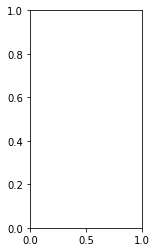

In [92]:
sns.kdeplot(data=JTS.df, x='date made')

Text(0.5, 0, '$Length_{initial} ~ (mm)$')

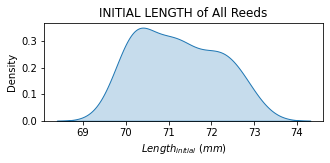

In [56]:
rcParams['figure.figsize'] = 5, 1.8
sns.kdeplot (x="len_init",data=JTS.df,shade=True)
plt.title("INITIAL LENGTH of All Reeds")
plt.xlabel("$Length_{initial} ~ (mm)$")

Text(0.5, 0, '$days$')

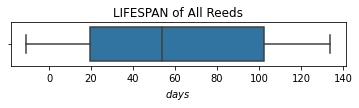

In [57]:
rcParams['figure.figsize'] = 6, 0.8
sns.boxplot (x="life",data=JTS.df)
plt.title("LIFESPAN of All Reeds")
plt.xlabel("$days$")

In [70]:
df_dummies = pd.get_dummies(JTS.df['color'])
del df_dummies[df_dummies.columns[-1]]
df_new = pd.concat([JTS.df, df_dummies], axis=1)
del df_new['color']
corel = df_new.corr().iloc[2:,0:2]
corel

,len_init,life
Berry,-0.182149,-0.053177
Blue,-0.043592,0.004518
Halloween,0.245798,-0.143211
Mint,0.011411,0.031036
Pink,0.067161,0.069867
Purple,-0.199275,0.045192


<AxesSubplot:>

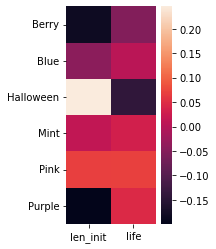

In [73]:
rcParams['figure.figsize'] = 2, 4
sns.heatmap(corel)

In [82]:
df = JTS.df
[ (round(df[df['color'] == x]['len_init'].mean(),2), x) for x in list(Reed.colors.values())]

[(71.25, 'Red'),
 (71.11, 'Blue'),
 (70.62, 'Purple'),
 (71.38, 'Pink'),
 (71.73, 'Halloween'),
 (70.68, 'Berry'),
 (71.23, 'Mint')]